# Hotel Reviews Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\train.csv")

In [2]:
data.head()

ID                                             Review  Rating
0   0  exceptional service nice all-around daughter s...       5
1   1  beautiful relaxing jw marriott desert ridge re...       5
2   2  great location great location 5 mins subway ta...       5
3   3  pleased nice safe hotel, flower market hotel v...       3
4   4  excellent hotel service great hotel excellent ...       4

In [3]:
data.describe()

ID        Rating
count  14343.000000  14343.000000
mean    7171.000000      3.965070
std     4140.611791      1.230439
min        0.000000      1.000000
25%     3585.500000      3.000000
50%     7171.000000      4.000000
75%    10756.500000      5.000000
max    14342.000000      5.000000

In [4]:
data.isnull().sum()

ID        0
Review    0
Rating    0
dtype: int64

In [5]:
data['Rating'].value_counts()

5    6436
4    4172
3    1510
2    1248
1     977
Name: Rating, dtype: int64

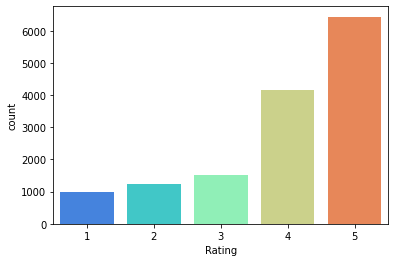

In [6]:
sns.countplot(x='Rating',data=data , palette='rainbow')

In [7]:
data['text length'] = data['Review'].apply(len)
data.head()

ID                                             Review  Rating  text length
0   0  exceptional service nice all-around daughter s...       5          937
1   1  beautiful relaxing jw marriott desert ridge re...       5          791
2   2  great location great location 5 mins subway ta...       5          473
3   3  pleased nice safe hotel, flower market hotel v...       3          342
4   4  excellent hotel service great hotel excellent ...       4          244

In [8]:
data['label_review'] = None
for index, rows in data.iterrows():
    if(rows['Rating'] >= 1 and rows['Rating'] < 3):
        data.at[index, 'label_review'] = 'Negative'
    elif(rows['Rating'] == 3):
        data.at[index,'label_review'] = 'Neutral'
    elif(rows['Rating'] > 3 and rows['Rating'] <= 5 ):
        data.at[index,'label_review'] = 'Positive'
data

ID                                             Review  Rating  \
0          0  exceptional service nice all-around daughter s...       5   
1          1  beautiful relaxing jw marriott desert ridge re...       5   
2          2  great location great location 5 mins subway ta...       5   
3          3  pleased nice safe hotel, flower market hotel v...       3   
4          4  excellent hotel service great hotel excellent ...       4   
...      ...                                                ...     ...   
14338  14338  hotel madrid hotel perfect, location tiny quie...       5   
14339  14339  excellent hotel stay florence hotel chosen tri...       5   
14340  14340  great place relax know looking vacation book t...       4   
14341  14341  better just got week seattle loved minute, pac...       3   
14342  14342  stay clear, internet reservation friday rang h...       1   

       text length label_review  
0              937     Positive  
1              791     Positive  
2              473     Positive  
3              342      Neutral  
4              244     Positive  
...            ...          ...  
14338          221     Positive  
14339          405     Positive  
14340         1697     Positive  
14341          214      Neutral  
14342          396     Negative  

[14343 rows x 5 columns]

# Text Preprocessing

In [9]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer, word_tokenize
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
en_stopwords = stopwords.words('english')

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
stop_words = stop_words.union(new_words)

corpus = []
for index, row in data.iterrows():
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', row['Review'])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)
    data.at[index, 'clean_review'] = text
data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ID                                             Review  Rating  \
0          0  exceptional service nice all-around daughter s...       5   
1          1  beautiful relaxing jw marriott desert ridge re...       5   
2          2  great location great location 5 mins subway ta...       5   
3          3  pleased nice safe hotel, flower market hotel v...       3   
4          4  excellent hotel service great hotel excellent ...       4   
...      ...                                                ...     ...   
14338  14338  hotel madrid hotel perfect, location tiny quie...       5   
14339  14339  excellent hotel stay florence hotel chosen tri...       5   
14340  14340  great place relax know looking vacation book t...       4   
14341  14341  better just got week seattle loved minute, pac...       3   
14342  14342  stay clear, internet reservation friday rang h...       1   

       text length label_review  \
0              937     Positive   
1              791     Positive   
2              473     Positive   
3              342      Neutral   
4              244     Positive   
...            ...          ...   
14338          221     Positive   
14339          405     Positive   
14340         1697     Positive   
14341          214      Neutral   
14342          396     Negative   

                                            clean_review  
0      exceptional service nice around daughter staye...  
1      beautiful relaxing jw marriott desert ridge re...  
2      great location great location min subway take ...  
3      pleased nice safe hotel flower market hotel va...  
4      excellent hotel service great hotel excellent ...  
...                                                  ...  
14338  hotel madrid hotel perfect location tiny quiet...  
14339  excellent hotel stay florence hotel chosen tri...  
14340  great place relax know looking vacation book t...  
14341  better got week seattle loved minute pacific p...  
14342  stay clear internet reservation friday rang ho...  

[14343 rows x 6 columns]

In [32]:
corpus[0]

'exceptional service nice around daughter stayed well priced hotel night king suite weekend night really impressed exceptionally welcoming service time reservation departure hotel employee talked really friendly eager help question amazed day age l shaped hotel pool tiny looked like fun kid hot tub exercise room well breakfast abundant make waffle add scrambled egg bacon sausage fruit available bagel muffin oatmeal yogurt wanted morning sort long line waiting make waffle waiting scrambled egg picky room really nice asked away freeway reading review earlier bit noisy hey city felt like deluxe room considering reasonable price nice bedding art wall really liked space needle bit window shuttle run hourly n reserve certain place certain time worked shuttle missed minute needed return space needle promptly paid cab fare asked definitely need stay near downtown seattle'

# Tokenisation

In [12]:
from nltk.tokenize import word_tokenize
corpusdata=data['clean_review'].apply(word_tokenize).tolist()
len(corpusdata),data.shape[0]

(14343, 14343)

In [31]:
corpusdata[14342]

['stay',
 'clear',
 'internet',
 'reservation',
 'friday',
 'rang',
 'hour',
 'later',
 'add',
 'thursday',
 'booking',
 'thursday',
 'rang',
 'let',
 'know',
 'arriving',
 'late',
 'said',
 'problem',
 'arrive',
 'pm',
 'hear',
 'oh',
 'n',
 'booking',
 'tonight',
 'n',
 'room',
 'total',
 'apathy',
 'concerned',
 'say',
 'sorrys',
 'look',
 'reservation',
 'book',
 'sorrys',
 'apathy',
 'finally',
 'say',
 'bb',
 'door',
 'call',
 'authority',
 'hang',
 'say',
 'sorry',
 'time',
 'incompetence',
 'management',
 'employee',
 'completely',
 'soured',
 'trip',
 'stay',
 'away']

In [14]:
corpusdata = np.asarray(corpusdata)
targets = np.asarray(data['Rating'].tolist())

In [15]:

corpus1 = data[data['Rating'] == 1]['clean_review'].apply(word_tokenize).tolist()
corpus2 = data[data['Rating'] == 2]['clean_review'].apply(word_tokenize).tolist()
corpus3 = data[data['Rating'] == 3]['clean_review'].apply(word_tokenize).tolist()
corpus4 = data[data['Rating'] == 4]['clean_review'].apply(word_tokenize).tolist()
corpus5 = data[data['Rating'] == 5]['clean_review'].apply(word_tokenize).tolist()

In [16]:
corpus1[1]

['avoid',
 'cost',
 'book',
 'hotel',
 'smit',
 'night',
 'early',
 'june',
 'lasted',
 'night',
 'hotel',
 'quite',
 'literally',
 'building',
 'site',
 'radiator',
 'double',
 'glazing',
 'panel',
 'left',
 'lying',
 'workman',
 'equipment',
 'floor',
 'lift',
 'operation',
 'stair',
 'quite',
 'frankly',
 'dangerous',
 'room',
 'clean',
 'wallpaper',
 'hanging',
 'wall',
 'carpet',
 'disgusting',
 'stunk',
 'stale',
 'cigarette',
 'hole',
 'ceiling',
 'bed',
 'date',
 'passed',
 'year',
 'ago',
 'clearly',
 'hear',
 'guest',
 'door',
 'paper',
 'wall',
 'cap',
 'badly',
 'bitten',
 'infestation',
 'night',
 'ended',
 'clothes',
 'bed',
 'bed',
 'n',
 'clean',
 'hotel',
 'need',
 'closed',
 'fully',
 'refurbished',
 'location',
 'totally',
 'misrepresents',
 'appalling',
 'quality',
 'disgusting',
 'use',
 'peril']

# Unigrams, Bigrams & Trigrams

In [17]:
def count_ngrams(corpusdata, n=2, ntop=None):
    ngrams = {}
    
    for clean_review in corpusdata:
        clean_review = tuple(clean_review)
        
        for i in range(0, len(clean_review) - n + 1): 
                # Get the n-gram from i to i+n
                ngram = clean_review[i:i+n]
                
                # check if the n-gram is in the dictionary
                if ngram in ngrams:
                    # Increment the count for this n-gram
                    ngrams[ngram] += 1
                else:
                    # Initialize this n-gram count to 1
                    ngrams[ngram] = 1
                    
    ngrams = pd.DataFrame.from_dict(ngrams, orient='index', columns=['count']).sort_values('count', ascending=False)
    
    ngrams.reset_index(inplace=True)
    
    ngrams['index'] = ngrams['index'].str.join(', ')
    
    
    if (ntop):
        ngrams = ngrams[:ntop]    
        
    return ngrams

In [18]:
uni_grams1 = count_ngrams(corpus1, n=1, ntop=10)
uni_grams2 = count_ngrams(corpus2, n=1,ntop=10)
uni_grams3 = count_ngrams(corpus3, n=1,ntop=10)
uni_grams4 = count_ngrams(corpus4, n=1,ntop=10)
uni_grams5 = count_ngrams(corpus5, n=1,ntop=10)

uni_grams1['Rating'] = 1
uni_grams2['Rating'] = 2
uni_grams3['Rating'] = 3
uni_grams4['Rating'] = 4
uni_grams5['Rating'] = 5

unigrams = pd.concat([uni_grams5, uni_grams4, uni_grams3, uni_grams2, uni_grams1])

In [19]:
import plotly.express as px
from plotly.subplots import make_subplots
fig = px.bar(unigrams, x="index", y="count", color="Rating", facet_col="Rating", title='Unigrams of Reviews Rating-wise' ,
             color_continuous_scale=["#EF553B", "#FFA15A", "#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [20]:

bi_grams1 = count_ngrams(corpus1,n=2,ntop=10)
bi_grams2 = count_ngrams(corpus2, n=2,ntop=10)
bi_grams3 = count_ngrams(corpus3, n=2,ntop=10)
bi_grams4 = count_ngrams(corpus4, n=2,ntop=10)
bi_grams5 = count_ngrams(corpus5, n=2,ntop=10)

bi_grams1['Rating'] = 1
bi_grams2['Rating'] = 2
bi_grams3['Rating'] = 3
bi_grams4['Rating'] = 4
bi_grams5['Rating'] = 5

bigrams = pd.concat([bi_grams5, bi_grams4, bi_grams3, bi_grams2, bi_grams1])

In [21]:

fig = px.bar(bigrams, x="index", y="count", color="Rating", facet_col="Rating", title='Bigrams of Reviews Rating-wise' ,
             color_continuous_scale=["#EF553B", "#FFA15A", "#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)
fig.update_layout(coloraxis_showscale=False)
fig.show()

In [22]:

tri_grams1 = count_ngrams(corpus1, n=3, ntop=10)
tri_grams2 = count_ngrams(corpus2, n=3, ntop=10)
tri_grams3 = count_ngrams(corpus3, n=3, ntop=10)
tri_grams4 = count_ngrams(corpus4, n=3, ntop=10)
tri_grams5 = count_ngrams(corpus5, n=3, ntop=10)

tri_grams1['Rating'] = 1
tri_grams2['Rating'] = 2
tri_grams3['Rating'] = 3
tri_grams4['Rating'] = 4
tri_grams5['Rating'] = 5

tri_grams = pd.concat([tri_grams5, tri_grams4, tri_grams3, tri_grams2, tri_grams1])

In [23]:
fig = px.bar(tri_grams, x="index", y="count", color="Rating", facet_col="Rating", title='Trigrams of Reviews Rating-wise',
             color_continuous_scale=["#EF553B", "#FFA15A", "#FECB52", "#B6E880", "#00CC96"])
fig.update_xaxes(matches=None)
fig.update_layout(coloraxis_showscale=False)
fig.show()

# Wordclouds

In [24]:
from wordcloud import WordCloud
stops = stopwords.words('english') + ['hotel', 'room', 'not']

w1 = WordCloud(color_func=lambda *args, **kwargs: "#EF553B", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 1]['clean_review']))

w2 = WordCloud(color_func=lambda *args, **kwargs: "#FFA15A", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 2]['clean_review']))

w3 = WordCloud(color_func=lambda *args, **kwargs: "#FECB52", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 3]['clean_review']))

w4 = WordCloud(color_func=lambda *args, **kwargs: "#B6E880", 
               background_color='white', 
               max_words=50, 
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 4]['clean_review']))

w5 = WordCloud(color_func=lambda *args, **kwargs: "#00CC96", 
               background_color='white', 
               max_words=50,
               stopwords=stops,
               random_state=42,
               height=1000, 
               width=1000) \
            .generate(" ".join(data[data['Rating'] == 5]['clean_review']))

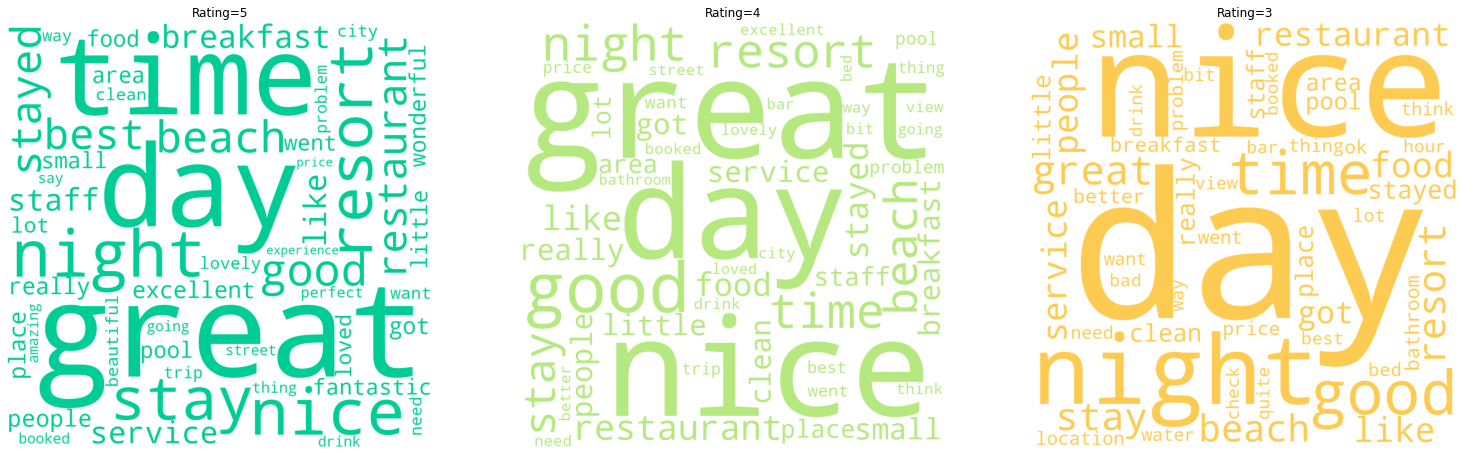

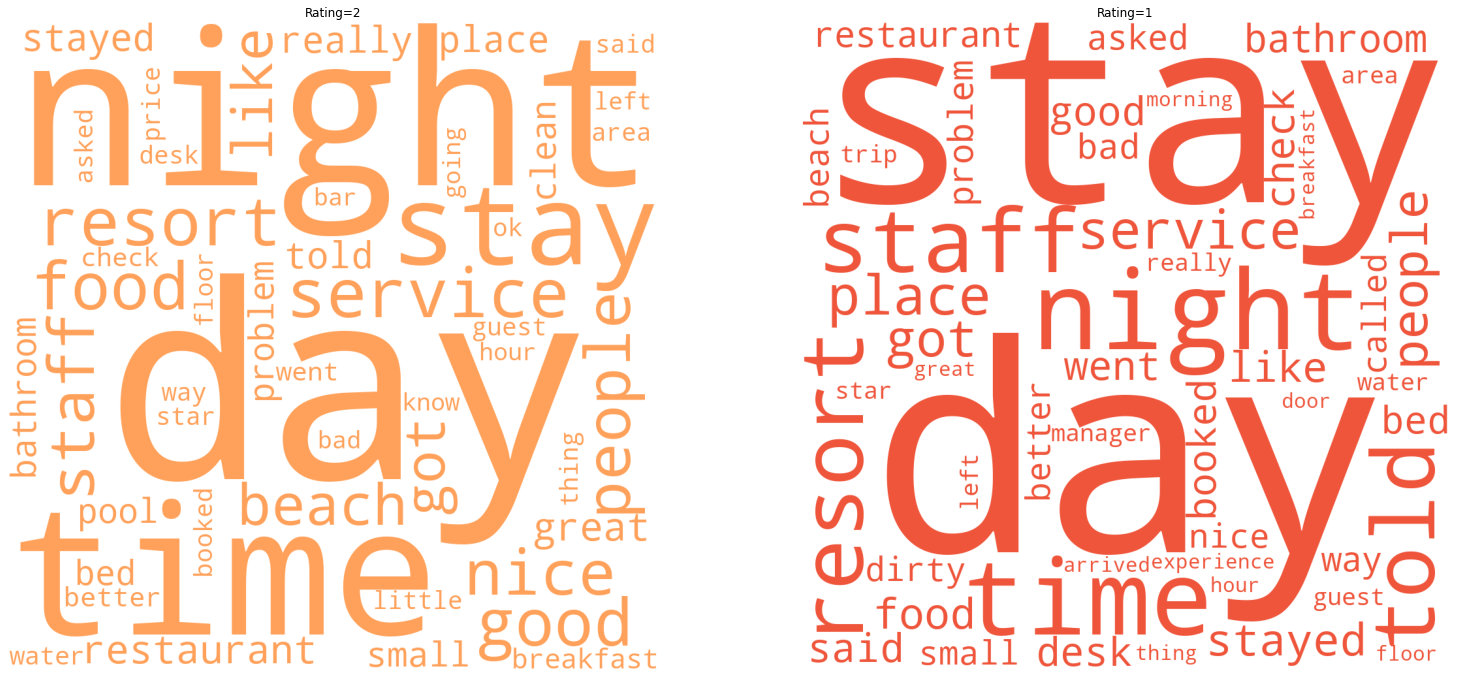

In [25]:
fig = plt.figure(figsize=(26, 12))

fig.add_subplot(1, 3, 1)
plt.axis('off')
plt.title('Rating=5')
plt.imshow(w5)

fig.add_subplot(1, 3, 2)
plt.title('Rating=4')
plt.axis('off')
plt.imshow(w4)

fig.add_subplot(1, 3, 3)
plt.axis('off')
plt.title('Rating=3')
plt.imshow(w3)

fig = plt.figure(figsize=(26, 12))


fig.add_subplot(1, 2, 1)
plt.title('Rating=2')
plt.axis('off')
plt.imshow(w2)

fig.add_subplot(1, 2, 2)
plt.title('Rating=1')
plt.axis('off')
plt.imshow(w1)

# Named Entity Recognition / Entity Extraction

In [33]:
import spacy
nlp = spacy.load('en')


Let’s find out the most frequent named entities in our corpus. For this, we will build a data frame consisting of all the named entities and their types.

In [43]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

To find top occuring entities and their types

In [44]:
# get the top named entities
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

0         1        2     3        4     5      6     7  \
Entity Name  night   english   second  week  morning   day  paris  hour   
Entity Type   TIME  LANGUAGE  ORDINAL  DATE     TIME  DATE    GPE  TIME   
Frequency     2623      1255      900   665      612   581    578   577   

                   8        9        10       11      12        13      14  
Entity Name  spanish  italian  american  evening  french  european  london  
Entity Type     NORP     NORP      NORP     TIME    NORP      NORP     GPE  
Frequency        549      503       502      499     438       405     384

Here, we can see that it has correctly identified spanish, italian, american as nationalities. We can also see that night is mostly used.

In [45]:
# get the top named entity types
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

0       1      2     3     4     5     6     7         8  \
Entity Type    ORG  PERSON    GPE  DATE  TIME   FAC  NORP   LOC  LANGUAGE   
Frequency    13585   10526  10001  9471  9465  5803  5751  1915      1560   

                    9       10       11     12        13   14  
Entity Type  CARDINAL  ORDINAL  PRODUCT  EVENT  QUANTITY  LAW  
Frequency        1229     1210      882    562       159  130

Here we can see organisation, person, and country/cities/states are the most mentioned entities